
**<h1>Introduction</h1>**



**<h3> Motivation </h3>**

The video game industry has always been a multi-billion dollar market, and Steam stands as its most dominant PC storefront. As a lifelong gamer, I have always been fascinated by the sheer volume of titles released yearly. Ranging from solo-developed Indie gems to massive AAA titles.

However, the marketplace is crowded. For every masterpiece, thousands of games go unnoticed. This project aims to move beyond subjective opinion and use data to understand what drives success on the platform. By analyzing pricing strategies, genre trends, and review sentiment, I aim to uncover the quantitative patterns that separate a game from being a success.. or a flop.

**<h3> Key Objectives: </h3>**
- Identify correlations between Genre and User Ratings.
- Analyse the pricing strategy differences between Indie and AAA titles.
- Determine if lower price points correlate with higher ratings.
- Predict whether a game will be a "hit" or a "flop" using XGBoost.

**<h3> Data Source: </h3>**
Dataset is created by Martin Bustos on Kaggle. Data is collected from both the API provided by Steam themselves and Steam Spy, a Steam stats service based on Web API provided by Valve. <br>
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data

**<h3> Attributes / Features: </h3>**
**AppID**: Unique identifier for each game on the Steam store.

**Name**: The game's title.

**Release date**: The date the game was released on Steam.

**Estimated owners**: A range estimating the number of people who own the game (e.g., "0 - 20000", "20000 - 50000").

**Peak CCU**: The peak number of Concurrent Users (players) in the game on the previous day.

**Required age**: The minimum age required to play the game (0 indicates all ages).

**Price**: The current price of the game in US Dollars.

**Discount**: The number of discounts the game has experienced.

**DLC count**: The number of downloadable content (DLC) packs available for the game. 

**About the game**: A brief text description or summary of the game's content.

**Supported languages**: A list of all languages supported by the game (interface, audio, or subtitles).

**Full audio languages**: A list of languages that have full audio support (voice acting).

**Reviews**: A text summary of the user review score (e.g., "Overwhelmingly Positive", "Mixed").

**Header image**: The URL to the game's main header image/banner on the store.

**Website**: The URL to the game's official website.

**Support url**: The URL for the game's customer support page.

**Support email**: The contact email address for game support.

**Windows**: True if the game is compatible with Windows, False otherwise.

**Mac**: True if the game is compatible with macOS, False otherwise.

**Linux**: True if the game is compatible with Linux, False otherwise.

**Metacritic score**: The game's critic score from Metacritic (0 if not available).

**Metacritic url**: The URL to the game's Metacritic page.

**User score**: A score calculated based on user reviews (0 if not available or insufficient data).

**Positive**: The total count of positive user reviews.

**Negative**: The total count of negative user reviews.

**Score rank**: A ranking of the game based on its user score compared to others (often null for most games).

**Achievements**: The total number of in-game achievements available.

**Recommendations**: The number of times users have recommended this game.

**Notes**: Extra information or warnings about the game content.

**Average playtime forever**: The average total playtime for all owners of the game (in minutes).

**Average playtime two weeks**: The average playtime in the last two weeks (in minutes).

**Median playtime forever**: The median total playtime for owners of the game (in minutes).

**Median playtime two weeks**: The median playtime in the last two weeks (in minutes).

**Developers**: The name of the studio or individual who created the game.

**Publishers**: The name of the company that published the game.

**Categories**: A list of game categories (e.g., "Single-player", "Multi-player", "Co-op").

**Genres**: A list of genres the game belongs to (e.g., "Action", "Indie", "RPG").

**Tags**: User-defined tags that describe the game (e.g., "Pixel Art", "Difficult").

**Screenshots**: URLs to screenshots of the gameplay.

**Movies**: URLs to trailers or promotional videos.

**<h2> 1. Data Preprocessing </h2>**

First let's import the libraries that we'll need for the Exploratory Data Analysis (EDA). 

In [133]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For our model later on.
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Lets read the dataset with Pandas.

In [135]:
steam_games = pd.read_csv('../data/games.csv')

Now, let's figure out how many rows and columns does this dataset have.

In [136]:
shape = steam_games.shape
print(f"The shape of the dataset is: {shape}")

The shape of the dataset is: (111452, 40)


Taking a peak at the top 5 rows..

In [137]:
steam_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Check for all the columns that are present in the dataset, lets see the attributes that we're working with.

In [138]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  object 
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  int64  
 6   Price                       111452 non-null  float64
 7   Discount                    111452 non-null  int64  
 8   DLC count                   111452 non-null  int64  
 9   About the game              104969 non-null  object 
 10  Supported languages         111452 non-null  object 
 11  Full audio languages        111452 non-null  object 
 12  Reviews                     10624 non-null   object 
 13  Header image  

Lets check for the missing values for each of the columns.

In [139]:
steam_games.isnull().sum()

AppID                              0
Name                               6
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
Discount                           0
DLC count                          0
About the game                  6483
Supported languages                0
Full audio languages               0
Reviews                       100828
Header image                       0
Website                        64994
Support url                    60693
Support email                  19025
Windows                            0
Mac                                0
Linux                              0
Metacritic score                   0
Metacritic url                107447
User score                         0
Positive                           0
Negative                           0
Score rank                    111408
Achievements                       0
R

Right off the bat, we can see some columns that have enormous amounts of missing values. Let's check the percentages for those missing values per column.

In [140]:
missing_percentage = (steam_games.isnull().sum() * 100 / len(steam_games)).sort_values(ascending = False)
print(missing_percentage)

Score rank                    99.960521
Metacritic url                96.406525
Reviews                       90.467645
Notes                         83.446686
Website                       58.315687
Support url                   54.456627
Tags                          33.577684
Support email                 17.070129
Movies                         8.631519
Categories                     6.788573
Publishers                     6.081542
About the game                 5.816854
Developers                     5.809676
Genres                         5.778272
Screenshots                    3.761260
Name                           0.005383
Median playtime forever        0.000000
Negative                       0.000000
Median playtime two weeks      0.000000
Average playtime forever       0.000000
Recommendations                0.000000
Achievements                   0.000000
Average playtime two weeks     0.000000
AppID                          0.000000
Positive                       0.000000


To get the obvious ones out of the way, I decided to drop 'Score rank', 'Metacritic url', 'Reviews', and 'Notes' due to their enormous percentage of missing values (around 80% and above) relative to the overall length of the dataset (111452 rows).

In addition, attempts at imputing values where the columns have > 80% of their values missing could lead to significant increases in bias and inaccuracies, as there is **insufficient amount of data to reliably estimate the missing values.**

I will also be dropping the columns that are irrelevant to our key objectives. This includes 'Website', 'Support url', 'Support email', 'Screenshots', and 'Movies'. As the questions we're about to answer doesn't need the links that these columns provide.

In [141]:
steam_games.drop(['Score rank', 'Metacritic url', 'Reviews', 'Support url', 'Notes', 'Website', 'Support email', 'Screenshots', 'Movies'], axis = 1, inplace = True)

In [142]:
steam_games.shape

(111452, 31)

We've verified that the 9 columns were dropped. Lets see how many columns are left for us to work with.

In [143]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  object 
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  int64  
 6   Price                       111452 non-null  float64
 7   Discount                    111452 non-null  int64  
 8   DLC count                   111452 non-null  int64  
 9   About the game              104969 non-null  object 
 10  Supported languages         111452 non-null  object 
 11  Full audio languages        111452 non-null  object 
 12  Header image                111452 non-null  object 
 13  Windows       

In [144]:
steam_games.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
Discount                          0
DLC count                         0
About the game                 6483
Supported languages               0
Full audio languages              0
Header image                      0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     6475
Publishers                  

In [145]:
print(steam_games['About the game'].value_counts())

About the game
Help the beautiful girls to immerse themselves in their memories and remember the wonderful moments of their lives. This game is a classic puzzle game with several levels of difficulty and beautiful arts. All characters appearing in this game are over 18 years of age. Enjoy ;-) - Puzzle Game - Artworks - Nice music - Steam achievements Keyboard H: Complete Level                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Since we dont plan on doing text analysis using NLP (Natural Language Processing) to analyse the keywords for this particular project, I plan on dropping the 'About the game' column as well.

In [146]:
steam_games.drop(['About the game'], axis = 1, inplace = True)

In [147]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Estimated owners            111452 non-null  object 
 4   Peak CCU                    111452 non-null  int64  
 5   Required age                111452 non-null  int64  
 6   Price                       111452 non-null  float64
 7   Discount                    111452 non-null  int64  
 8   DLC count                   111452 non-null  int64  
 9   Supported languages         111452 non-null  object 
 10  Full audio languages        111452 non-null  object 
 11  Header image                111452 non-null  object 
 12  Windows                     111452 non-null  bool   
 13  Mac           

This leaves us with around 30 columns! a relatively huge reduction of features from the initial count of 40 columns.

In [148]:
steam_games.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
Discount                          0
DLC count                         0
Supported languages               0
Full audio languages              0
Header image                      0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     6475
Publishers                     6778
Categories                  

To handle the missing developers and publishers, we could impute the "Unknown" value to substitute the missing values. This is because the names of the developer and publishers could influence the success of the games.

The same goes for the 'Categories', 'Genres', and 'Tags' column. I initially thought of using the mode (for example if the leading genre was Horror, then all the missing values would be imputed as Horror also), but this could artificially alter the data to be imbalanced and increase the bias. Another risk would be that we would just plainly miscategorise a game.

In [149]:
# Impute the 'Unknown' values to substitute the missing values.
steam_games['Developers'] = steam_games['Developers'].fillna('Unknown')
steam_games['Publishers'] = steam_games['Publishers'].fillna('Unknown')
steam_games['Categories'] = steam_games['Categories'].fillna('Unknown')
steam_games['Genres'] = steam_games['Genres'].fillna('Unknown')
steam_games['Tags'] = steam_games['Tags'].fillna('Unknown')

In [150]:
steam_games.isnull().sum()

AppID                         0
Name                          6
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
Discount                      0
DLC count                     0
Supported languages           0
Full audio languages          0
Header image                  0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

But we can see that there is 6 empty values for the 'Name' column, lets check it out.

In [151]:
print(steam_games[steam_games['Name'].isnull()])

         AppID Name  Release date Estimated owners  Peak CCU  Required age  \
25222   396420  NaN   Nov 1, 2016            0 - 0         0             0   
72038  1116910  NaN  Sep 25, 2019            0 - 0         0             0   
77215  1365520  NaN  Aug 30, 2020            0 - 0         0             0   
77487  1080790  NaN  Jul 12, 2019            0 - 0         0             0   
77561  1256960  NaN  Mar 11, 2020        0 - 20000         0             0   
77721  1172120  NaN  Jan 23, 2020            0 - 0         0             0   

       Price  Discount  DLC count  \
25222   0.00         0          0   
72038   6.99         0          0   
77215   0.00         0          0   
77487   0.00         0          0   
77561   0.00         0          0   
77721   0.00         0          0   

                                     Supported languages  ... Recommendations  \
25222                                                 []  ...               0   
72038                          

Since the all the other values for the columns are still there, the game's name is irrelevant. Hence, we'll be imputing the 'Unknown' value for these empty rows for the 'Name' column.

In [152]:
steam_games['Name'] = steam_games['Name'].fillna('Unknown')

In [153]:
steam_games.isnull().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
Discount                      0
DLC count                     0
Supported languages           0
Full audio languages          0
Header image                  0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

We have successfully removed all of the empty values from all of the remaining columns. Now, I'm looking to split the 'Release date' column into 'Release year', 'Release month', and 'Day of Week' to unlock more analytical opportunities down the line in our dataset.

In [154]:
# errors='coerce' turns weird stuff like "Coming Soon" into NaT (Not a Time) so it doesn't crash.
steam_games['Release date'] = pd.to_datetime(steam_games['Release date'], errors = 'coerce')

# Extract the features into the new columns.
steam_games['Release year'] = steam_games['Release date'].dt.year
steam_games['Release month'] = steam_games['Release date'].dt.month_name() 
steam_games['Release day'] = steam_games['Release date'].dt.day_name()

# Drop the rows where the Date conversion failed (the NaT values).
steam_games.dropna(subset = ['Release year'], inplace = True)

# Force the Year column to be Integers (2008 instead of 2008.0).
steam_games['Release year'] = steam_games['Release year'].astype(int)

print(steam_games[['Release year', 'Release month', 'Release day']].head())

   Release year Release month Release day
0          2008       October     Tuesday
1          2017       October    Thursday
2          2021      November   Wednesday
3          2020          July    Thursday
4          2020      February      Monday


In [155]:
steam_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Release year,Release month,Release day
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,0,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008,October,Tuesday
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,0,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017,October,Thursday
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,0,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",Unknown,2021,November,Wednesday
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,0,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020,July,Thursday
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,0,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020,February,Monday


Now with the missing values out of the way, lets check for duplicate values for the 'AppID' column. Its important that duplicates of the values in this column is not present, since it means that there could be two identical games in this dataset. 

In [156]:
# Check if there are duplicates (based on the Unique ID).
duplicates_count = steam_games.duplicated(subset=['AppID']).sum()
print(f"Number of duplicate games: {duplicates_count}")

Number of duplicate games: 0


Don't forget to check the duplicates in the 'Name' column as well.

In [157]:
duplicates_count_name = steam_games.duplicated(subset = ['Name']).sum()
print(f"Number of duplicate games: {duplicates_count_name}")

Number of duplicate games: 1125


In [158]:
# keep=False shows ALL duplicates (the original and the copy).
duplicates = steam_games[steam_games.duplicated(subset = ['Name'], keep = False)]
# Sort the twins to appear next to each other.
duplicates_sorted = duplicates.sort_values(by = 'Name')
# Show the Name, Developer, and Price to compare.
print(duplicates_sorted[['Name', 'Developers', 'Price', 'Release year']].head(10))

                      Name                  Developers  Price  Release year
40882   3D Organon Anatomy                 Medis Media  24.99          2017
15733   3D Organon Anatomy                 Medis Media   0.00          2019
13384  A Walk in the Woods      Something Dark Studios   0.00          2018
58867  A Walk in the Woods    Brightdawn Entertainment   0.00          2020
40121                ALONE                   DakeCraft   0.79          2021
14510                ALONE                   True Nuke   8.99          2021
7238                 ASTRA                Crooked Road   9.99          2021
12414                ASTRA              Amemi Kinosuke   0.00          2021
84834                ASTRA  NewOrderFantasySimulations   2.69          2024
99898                AWAKE                 REZA ALIDAD  16.99          2024


Turns out there are duplicates with the same developers and also just games with the same name but different developers. Thus, my approach is to have the game with the higher rating (usually the remastered edition of the game) to be counted, removing the lesser rated one.

In [159]:
# To ensure the version with MORE ratings sits at the top.
steam_games.sort_values(by = 'Positive', ascending=False, inplace=True)

# Drop duplicates ONLY if 'Name' AND 'Developers' are identical.
# keep='first' keeps the one with the higher rating (because we sorted above).
steam_games.drop_duplicates(subset = ['Name', 'Developers'], keep = 'first', inplace = True)

Now lets check the number of remaining duplicates and inspect them, now the games with the same name should have different developers. This is what we want for our dataset.

In [160]:
duplicates_count_name = steam_games.duplicated(subset = ['Name']).sum()
print(f"Number of duplicate games: {duplicates_count_name}")

Number of duplicate games: 967


In [161]:
duplicates = steam_games[steam_games.duplicated(subset = ['Name'], keep = False)]
duplicates_sorted = duplicates.sort_values(by = 'Name')
print(duplicates_sorted[['Name', 'Developers', 'Price', 'Release year']].head(10))

                      Name                  Developers  Price  Release year
58867  A Walk in the Woods    Brightdawn Entertainment   0.00          2020
13384  A Walk in the Woods      Something Dark Studios   0.00          2018
14510                ALONE                   True Nuke   8.99          2021
40121                ALONE                   DakeCraft   0.79          2021
84834                ASTRA  NewOrderFantasySimulations   2.69          2024
12414                ASTRA              Amemi Kinosuke   0.00          2021
7238                 ASTRA                Crooked Road   9.99          2021
99898                AWAKE                 REZA ALIDAD  16.99          2024
78217                AWAKE                       Diios   0.00          2015
9943             Abandoned                   Krenliper   1.99          2021


Nice, looks like theres no duplicate games with the same dev, now lets just verify to make sure.

In [162]:
# Check for duplicates specifically on the combined columns.
dupe_check = steam_games.duplicated(subset=['Name', 'Developers']).sum()
print(dupe_check)

0


Let's separate the strings for the 'Genres' column. This allows us to make analytics for each of the genres.

In [163]:
steam_games['Genres'].value_counts()

Genres
Unknown                                                                                                     6422
Casual,Indie                                                                                                6235
Action,Indie                                                                                                5167
Action,Adventure,Indie                                                                                      4571
Adventure,Indie                                                                                             3892
                                                                                                            ... 
Sexual Content,Adventure,Indie,Simulation                                                                      1
Violent,Gore,Casual,Indie                                                                                      1
Animation & Modeling,Design & Illustration,Education,Video Production                    

In [164]:
# Create temporary dataframe to handle the missing values
# We drop rows with missing genres first to avoid errors.
genre_df = steam_games.dropna(subset = ['Genres']).copy()

# Split the string into a list. For example,  ["Action", "Indie"].
genre_df['Genres'] = genre_df['Genres'].str.split(',')

Now for the 'Estimated Users' column, lets take the midpoint of the estimated count so that the data type of this column can be an integer for easier analysis quantitatively later on.

In [165]:
steam_games['Estimated owners'].value_counts()

Estimated owners
0 - 20000                70060
0 - 0                    22055
20000 - 50000             8246
50000 - 100000            4052
100000 - 200000           2642
200000 - 500000           2197
500000 - 1000000           914
1000000 - 2000000          515
2000000 - 5000000          328
5000000 - 10000000          91
10000000 - 20000000         37
20000000 - 50000000         20
50000000 - 100000000         5
100000000 - 200000000        1
Name: count, dtype: int64

In [166]:
def get_midpoint(range_str):
    if '-' in range_str:
        low, high = range_str.split(' - ')
        return (int(low) + int(high)) // 2
    return 0

steam_games['Estimated owners'] = steam_games['Estimated owners'].apply(get_midpoint)

Lets check the state of our dataset after our preprocessing step.

In [167]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111163 entries, 46158 to 111451
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   AppID                       111163 non-null  int64         
 1   Name                        111163 non-null  object        
 2   Release date                111163 non-null  datetime64[ns]
 3   Estimated owners            111163 non-null  int64         
 4   Peak CCU                    111163 non-null  int64         
 5   Required age                111163 non-null  int64         
 6   Price                       111163 non-null  float64       
 7   Discount                    111163 non-null  int64         
 8   DLC count                   111163 non-null  int64         
 9   Supported languages         111163 non-null  object        
 10  Full audio languages        111163 non-null  object        
 11  Header image                111163 non-n

In [168]:
steam_games.shape

(111163, 33)

In [169]:
steam_games.isnull().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
Discount                      0
DLC count                     0
Supported languages           0
Full audio languages          0
Header image                  0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
Release year                  0
Release 

In [170]:
steam_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Release year,Release month,Release day
46158,730,Counter-Strike: Global Offensive,2012-08-21,75000000,825215,0,0.00,0,1,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...",...,6357,253,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",2012,August,Tuesday
17585,570,Dota 2,2013-07-09,150000000,558759,0,0.00,0,2,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...",...,880,749,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",2013,July,Tuesday
57205,271590,Grand Theft Auto V,2015-04-13,35000000,170527,17,0.00,0,1,"['English', 'French', 'Italian', 'German', 'Sp...",...,6274,154,Rockstar North,Rockstar Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure","Open World,Action,Multiplayer,Automobile Sim,C...",2015,April,Monday
8885,578080,PUBG: BATTLEGROUNDS,2017-12-21,75000000,275374,0,0.00,0,0,"['English', 'Korean', 'Simplified Chinese', 'F...",...,7134,152,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",2017,December,Thursday
46416,105600,Terraria,2011-05-16,35000000,39165,0,9.99,0,2,"['English', 'French', 'Italian', 'German', 'Sp...",...,1810,201,Re-Logic,Re-Logic,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Indie,RPG","Open World Survival Craft,Sandbox,Survival,2D,...",2011,May,Monday


All is good! we can finally move on to answering our objectives at the start.

**<h2> 1. Which genres tend to have higher ratings?</h2>**

First we'll have each genre from each game to be in their own row (explode). Then we'll define the rating as the ratio of positive / (positive / negative). We'll also want genres that are established (aka > 50 games), this allows us to avoid obscure and weird genres that are small in number. <br>

After that's done, we can group by genre and get the mean rating for the genres (sorted).

In [ ]:
# This duplicates the game row for EACH genre it has. 
genre_exploded = genre_df.explode('Genres')

# Calculate stats per Genre.
# We define "Rating" as the ratio of Positive / (Positive + Negative).
genre_exploded['Total Reviews'] = genre_exploded['Positive'] + genre_exploded['Negative']
genre_exploded['Rating'] = genre_exploded['Positive'] / genre_exploded['Total Reviews']

# Filter: Only look at genres with at least 50 games so we don't get weird obscure genres.
genre_counts = genre_exploded['Genres'].value_counts()
major_genres = genre_counts[genre_counts > 50].index

# Filter the data to only include major genres.
genre_stats = genre_exploded[genre_exploded['Genres'].isin(major_genres)]

# Group by Genre and get the mean rating.
genre_rankings = genre_stats.groupby('Genres')['Rating'].mean().sort_values(ascending = False)

print(genre_rankings.head(10))

Genres
Casual                   0.772349
Photo Editing            0.771254
Indie                    0.768822
Game Development         0.766571
Adventure                0.765259
Free To Play             0.759871
Action                   0.755839
RPG                      0.754467
Early Access             0.753980
Design & Illustration    0.752540
Name: Rating, dtype: float64


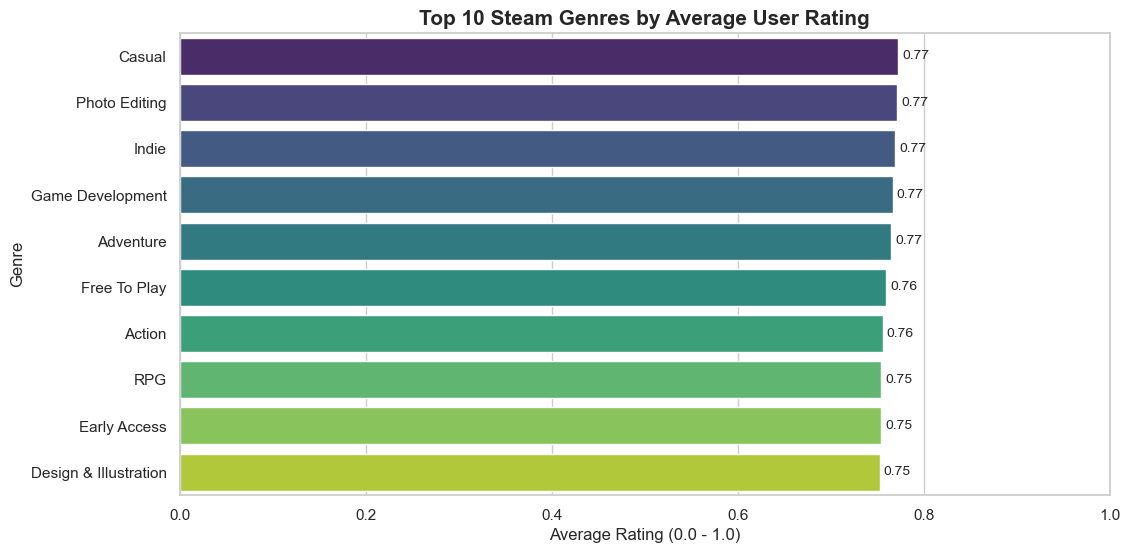

In [ ]:
# Take top 10 genres by mean rating.
top_10_genres = genre_rankings.head(10).reset_index()
top_10_genres.columns = ['Genre', 'Average Rating']

plt.figure(figsize = (12, 6))
sns.set_theme(style = "whitegrid") 

ax = sns.barplot( data = top_10_genres, x = 'Average Rating', y = 'Genre', palette = 'viridis')

for i in ax.containers:
    ax.bar_label(i, fmt = '%.2f', padding = 3, fontsize = 10)

plt.title('Top 10 Steam Genres by Average User Rating', fontsize = 15, fontweight = 'bold')
plt.xlabel('Average Rating (0.0 - 1.0)', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.xlim(0, 1) 

plt.show()

**<h4> Observations: </h4>**
- As we can see, the genres 'Casual" and 'Indie' games top the list. This suggests that communities of the games that are created by one or few individuals and are relatively simple in gameplay are often happier and more satisfied with their games compare to those of the mass-market AAA game audiences.

- The 'Photo Editing' genre sits pretty highly on our list at 2nd place, which signifies that most photo editing software available on steam manages to satisfy most of the users.
